<a href="https://colab.research.google.com/github/alexvaroz/data_science_alem_do_basico/blob/master/IntroPlusPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

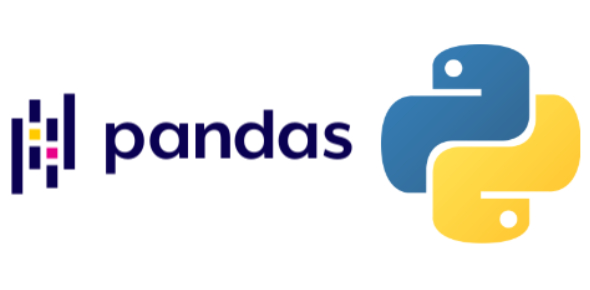

# Só mais uma introdução ao **Pandas**...

Este material é mais uma tentativa de abordar os principais comandos necessários para um usuário que esteja tendo o primeiro contato com a biblioteca Pandas.

Antes, uma rápida cotextualização sobre esse recurso:

`Pandas é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Por ser a principal e mais completa biblioteca para estes objetivos, ter familiaridade e fluência com o Pandas é uma competência imprescindível para profissionais que desejem manipular dados.`

## Obtenção dos dados

Para a apresentação e exploração dos reucrsos do Pandas, serão explorados os dados a respeito da população, localização, área, PIB entre outros aspectos de vários países do mundo. O dataset está disponível [aqui](https://www.kaggle.com/datasets/fernandol/countries-of-the-world) e será obtido de forma automática para o ambiente de trabalho com a execução da célula a seguir.

In [ ]:
!wget -q https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/countries.zip
!unzip '/content/countries.zip'

Com o arquivo `countries of the world.csv` disponível no ambiente Colab, será possível iniciar a atividade de análise dos dados.

*Importante destacar que o arquivo foi armazenado em uma área volátil (não foi necessário montar o drive), ou seja, sempre que o notebook for ser executado, a operação de download terá que ser realizada.*

## Importação das bibliotecas

Para a utilização do Pandas, assim como qualquer biblioteca Python, é necessário realizar a importação, indicando que as funcionalidades estarão disponíveis a partir daí.

In [ ]:
import pandas as pd

## Carga do DataFrame

O Pandas possui duas estrutura de dados principais: `DataFrame` e `Series`.

O DataFrame é uma estrutura bidimensional de dados, como uma planilha. Comumente, os dados a serem analisados são carregados na forma de DataFrame.
A outra estrutura de dados é a 'Series' que seria unidimensional. Cada coluna de um DataFrame é uma Series. 

A utilização plena dos recursos do Pandas passa pelo conhecimento e domínio dos diversos métodos disponíveis em cada estrutura.

Para carregar os dados o Pandas fornece métodos específicos a depender do formato do arquivo de dados. No caso, como o arquivo possui o formato `csv`, será utilizado o método `read_csv()`. O atributo "decimal" será necessário devido ao padrão internacional seguido pelos dados, diferindo as casas decimais com ','. O atributo marcará os dados que possuam ',' com vírgula, transformando-os em dados do tipo 'float

O DataFrame será gerado e inserido na variável **`df`**.

In [ ]:
df = pd.read_csv('/content/countries of the world.csv', decimal = ',')

# Os comandos abaixo retiram os espaços eventualmente existentes antes e após o conteúdo do campo
# O objetivo deles é só evitar que a presença de um caracter de espaço influencie na comparação do coteúdo
df['Region'] = df['Region'].str.strip() 
df['Country'] = df['Country'].str.strip()

## Primeiro contato com os dados

Para uma primeira olhada nos dados do DataFrame, são interessantes os comandos **'head()'**[mostra as 5 primeiras linhas], **'tail()'** [mostra as 5 últimas linhas do DataFrame], **sample()** [pega números aleatórios] e **shape** [apresenta a quantidade de linhas e colunas do DataFrame].

In [ ]:
# O primeiro valor é o número de linhas, o segundo é o número de colunas
df.shape

In [ ]:
# Indicando um número como parâmetro, é apresentada essa quantidade de linhas 
df.head()

In [ ]:
df.tail()

In [ ]:
# Ao contrário dos dois comandos anteriores, a ausência de parâmetros não indica que seriam 5 elementos, mas apenas 1. 
# Entretanto, o comportamento é o mesmo dos anteriores ao indicar a quantidade de registros desejados como parâmetro.
df.sample()

Outro comando útil é o `columns`, que lista as colunas do DataFrame.

In [ ]:
df.columns

A mudança de formato do DataFrame pode ser acionado com o parâmetro '**T**', possibilitando uma outra visão.

In [ ]:
df.T

Outro ponto importante a avaliar em uma primeira inspeção sobre os dados é o tipo de cada coluna. O comando `dtypes` devolve essa informação.

No Pandas, quando o tipo do dado é `string` (textual) a representação é como **object**.

In [ ]:
df.dtypes

Para obter as principais medidas estatísticas dos campos **numéricos** do DataFrame, basta utilizar o comando `describe()`.

In [ ]:
df.describe()

No caso, ficaram de fora os campos `Country` e `Region` por se tratarem de campos não-numéricos. Para esse caso, pode-se usar uma variação `df.describe(include=['O'])` que apresentará medidas estatísticas ligadas a campos categóricos.

In [ ]:
df.describe(include=['O'])

Os comandos listados até aqui são interessantes para uma primeira verificada no conteúdo carregado no DataFrame.

## Obtenção de informações de consolidação

Os comandos abaixo são interessantes para recuperarem informações agregadas dos DataFrames ou Series.

* value_counts()<br>
Contar a quantidade que cada valor do dado se repete. Muito importante para campos categóricos.

* count()<br>
Contar a quantidade não nula de valores de um DataFrame.


* sum() / max() / mean() / std() / median()<br>
Realizam operações matemáticas sugeridas pelos nomes. Adequados para campos numéricos.

* describe()<br>
Oferece de forma simples as principais métricas estatísticas de atributos numéricos do DataFrame.


In [ ]:
# value_counts
df['Region'].value_counts()

A região `SUB-SAHARAN AFRICA`, [África Subsariana](https://pt.wikipedia.org/wiki/%C3%81frica_subsariana) é a que possui mais países.

In [ ]:
# count
df.count()

No caso, `Climate`(clima) e `Literacy (%)` (taxa de alfabetização) são os campos que possuem mais valores sem preenchimento (valores faltantes).

In [ ]:
# Soma da população de todos os países listados
df['Population'].sum()

In [ ]:
# # População do país com menor população dentre os listados, seria a China??
df['Population'].max()

In [ ]:
# População do país com menor população dentre os listados
df['Population'].min()

In [ ]:
# População média dos países listados
df['Population'].mean()

Que tal treinar um pouco?

1) Qual seria o PIB per capita (`GDP ($ per capita)`) médio entre os países listados? (resposta: `9689.823008849558`)

2) Qual seria o maior PIB per capita (`GDP ($ per capita)`) entre os países listados? (resposta: `55100.0`)

3) Qual seria o menor PIB per capita (`GDP ($ per capita)`) entre os países listados? (resposta: `500.0`)

4) Apresente as 10 primeiras linhas do DataFrame.

5) Apresente 10 linhas aleatórias do DataFrame.

## Filtragem de valores no DataFrame

É muito frequente e importante a utilização do recurso de filtragem de informações do DataFrame. O filtro pode ocorrer por colunas, por linhas ou ambos.

O filtro por colunas seria listar os nomes das colunas desejadas.

In [ ]:
# Uma Series é obtida
df['Country']

In [ ]:
type(df['Country'])

Caso o objetivo seja trabalhar com essa estrutura, pode-se atribuir uma variável a ela e lidar com ela conforme desejado.

In [ ]:
paises = df['Country']

In [ ]:
paises

Para selecionar mais de uma coluna, há que se inserir as colunas como uma lista.

In [ ]:
df[['Country','GDP ($ per capita)']]

É possível filtrar por linhas, tanto devido à posição, quanto ao valor.

Para filtrar pela posição, há que se passar o intervalo. Po exemplo, filtrar as linhas 2 a 7.

In [ ]:
# Os intervalos sempre não incluem o limite superior
df[2:8]

Também é possível selecionar uma determinada linha a partir do índice. No caso, será utilizado o comando `.loc`.

In [ ]:
# Para verificar que o índice foi gerado automaticamente e é numérico sequencial
df.index

In [ ]:
# Para selecionar o conteúdo apresentado na linha de índice 3
df.loc[3]

Uma variação seria o comando `iloc` que recebe a **posição** da linha. Como o índice é a própria posição da linha, não tem diferença nesse DataFrame.

In [ ]:
df.iloc[3]

O outro tipo de filtragem é com base no conteúdo. Por exemplo, se o objetivo for filtrar as informações dos países localizados na `OCEANIA`.

In [ ]:
df[df['Region'] == 'OCEANIA']

Importante verificar a estrutura do filtro:

* Define-se o critério de filtragem, no caso, da região ser a Oceania ->> df['Region']== 'OCEANIA'

* Em seguida, envolve-se o critério com o DataFrame->> 
df[df['Region']== 'OCEANIA']

O resultado é um DataFrame que pode ser armazenado em uma variável e trabalhado conforme a necessidade.

In [ ]:
oceania = df[df['Region']== 'OCEANIA']

In [ ]:
# Seria o PIB per capita médio entre os países localizados na Oceania
oceania['GDP ($ per capita)'].mean()

In [ ]:
# Nome dos países localizados na Oceania
oceania['Country']

Cabe destacar a possibilidade de efetuar uma filtragem composta de mais de um critério. Por exemplo, se o interesse for pelos paĩses da Oceania que o PIB per capita acima de U$ 9000,00.

In [ ]:
df[(df['Region']== 'OCEANIA') & (df['GDP ($ per capita)'] >= 9000) ]

Hora de treinar um pouco...

1) Liste o nome dos países localizados entre as linhas 20 e 32.(resposta: 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'British Virgin Is.',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma')


2) Qual seria o PIB per capita (GDP ($ per capita)) médio entre os países localizados na América do Norte (NORTHERN AMERICA)? (resposta: 26100.0)

3) Qual seria a taxa de alfabetização (`Literacy`) do Brasil? É maior ou menor que a média mundial?(resposta: 86.4)

4) Qual seria a população da China? É o país com maior população?(resposta: 1313973713)

### Ordenação de valores 

Um recurso muito importante é a ordenação de valores no DataFrame ou na Series. O comando utilizado é o `sort_values()`, sendo o atributo utilizado como critério passado como parâmetro. Por exemplo, se o objetivo for ordenar os países pelo tamanho da população:

In [ ]:
df.sort_values(by='Population')

A ordenação ocorreu de forma **crescente**, que é a padrão. Se o objetivo for ordenar de forma **descrescente**, deve-se utilizar o parâmetro `ascending=False`.

In [ ]:
df.sort_values(by='Population', ascending = False)

Se o objetivo for obter os cinco países mais populosos, o caminho é complementar o comando com `head()`.

In [ ]:
df.sort_values(by='Population', ascending = False).head()

Hora de praticar...

1) Liste o nome dos 7 países com menor índice de alfabetização.(resposta: 'Niger', 'Burkina Faso', 'Sierra Leone', 'Guinea', 'Afghanistan',
       'Somalia', 'Gambia, The', 'Senegal')

2) Liste o nome dos 8 países com maior PIB per capita. (resposta: 'Luxembourg', 'Norway', 'United States', 'Bermuda','Cayman Islands', 'San Marino', 'Switzerland', 'Denmark')

Essas foram somente uma parte bem restrita de funcionalidades do Pandas. Para o detalhamento dos comandos e seus diversos parâmetros, a melhor fonte de informações é a documentação oficial disponível [aqui](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html).

Para a continuidade do aprendizado, elabore mais 10 perguntas a respeito dos dados e tente responder utilizando o conhecimento adquirido. Um exemplo de pergunta poderia ser:

- Qual a país da America do Sul/Caribe possui a maior taxa de *phones* por 1000 habitantes?